# EXPLORATORY DATA ANALYSIS

### Loading Data from Curated Table

In [1]:
%pip install scipy seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

pandas_df = pd.read_csv(r'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Curated\curated_table.csv')

### Checking for Null values

In [3]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   score_id         5000 non-null   int64 
 1   Training_id      5000 non-null   int64 
 2   Emp_id           5000 non-null   int64 
 3   score            5000 non-null   int64 
 4   punctuality      5000 non-null   int64 
 5   discipline       5000 non-null   int64 
 6   standards        5000 non-null   int64 
 7   remarks          5000 non-null   object
 8   is_promoted      5000 non-null   int64 
 9   name             5000 non-null   object
 10  email            5000 non-null   object
 11  password         5000 non-null   object
 12  Gender           5000 non-null   object
 13  Role             5000 non-null   object
 14  Region           5000 non-null   object
 15  Department       5000 non-null   object
 16  Designation      5000 non-null   object
 17  Date_of_Birth    5000 non-null   

### TypeCasting

In [4]:
# Converting date column datatype to DateTime format
pandas_df['start_date'] = pd.to_datetime(pandas_df['start_date'], errors='coerce')
pandas_df['end_date'] = pd.to_datetime(pandas_df['end_date'], errors='coerce')
pandas_df['Date_of_Joining'] = pd.to_datetime(pandas_df['Date_of_Joining'], errors='coerce')
pandas_df['Date_of_Birth'] = pd.to_datetime(pandas_df['Date_of_Birth'], errors='coerce')

pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   score_id         5000 non-null   int64         
 1   Training_id      5000 non-null   int64         
 2   Emp_id           5000 non-null   int64         
 3   score            5000 non-null   int64         
 4   punctuality      5000 non-null   int64         
 5   discipline       5000 non-null   int64         
 6   standards        5000 non-null   int64         
 7   remarks          5000 non-null   object        
 8   is_promoted      5000 non-null   int64         
 9   name             5000 non-null   object        
 10  email            5000 non-null   object        
 11  password         5000 non-null   object        
 12  Gender           5000 non-null   object        
 13  Role             5000 non-null   object        
 14  Region           5000 non-null   object 

### Checking for duplicate records

In [5]:
duplicates = pandas_df.duplicated()
count_Of_Duplicates = 0
for i in duplicates:
    if i == 'True':
        count_Of_Duplicates += 1
print(count_Of_Duplicates)

0


## Validation of Hypotheses

### Hypothesis : Department of the Employee affects Promotion Rate

C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_22392\3075461553.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Department', y='is_promoted', data=department_promotion_rate, palette='viridis')


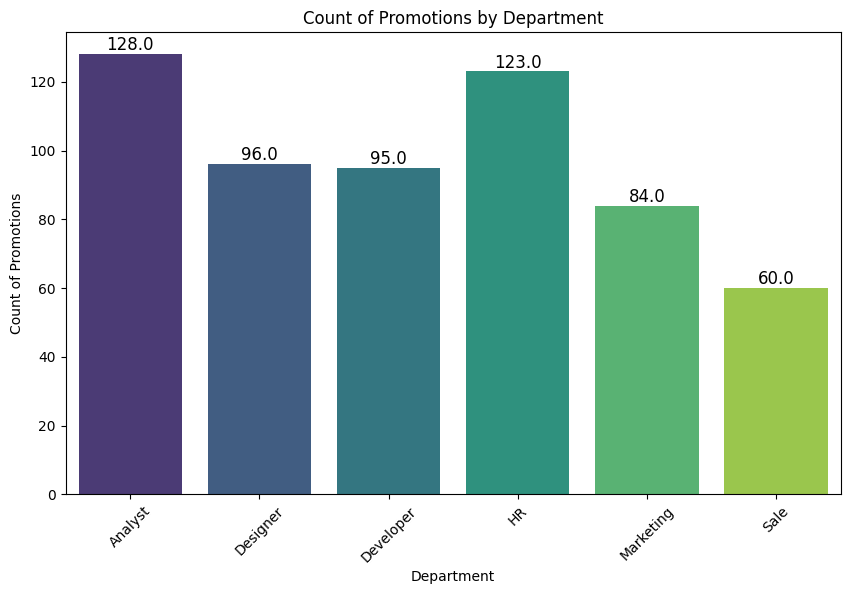

In [6]:
department_promotion_rate = pandas_df[pandas_df['is_promoted']==1].groupby('Department')['is_promoted'].count().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Department', y='is_promoted', data=department_promotion_rate, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)
    
plt.title('Count of Promotions by Department')
plt.xlabel('Department')
plt.ylabel('Count of Promotions')
plt.xticks(rotation=45)
plt.show()

### Hypothesis : Gender of the Employee affects Promotion Rate

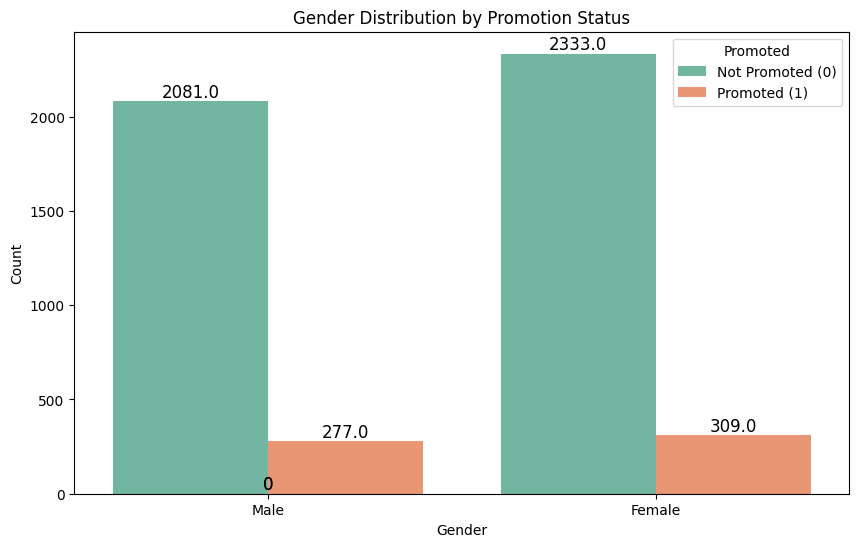

In [7]:
plt.figure(figsize=(10, 6))

# Create a count plot for gender against promotion status
ax = sns.countplot(x='Gender', hue='is_promoted', data=pandas_df, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)

# Set titles and labels
plt.title('Gender Distribution by Promotion Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Promoted', labels=['Not Promoted (0)', 'Promoted (1)'])
plt.show()

### Hypothesis : Employees with higher training scores are more likely to be promoted.

C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_22392\1719792680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_promoted', y='score', data=pandas_df, palette='Set2')


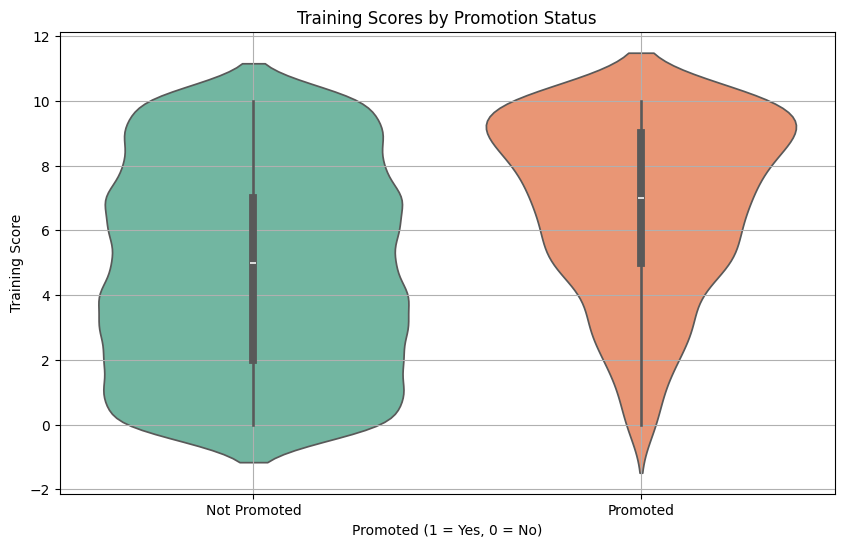

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_promoted', y='score', data=pandas_df, palette='Set2')
plt.title('Training Scores by Promotion Status')
plt.xlabel('Promoted (1 = Yes, 0 = No)')
plt.ylabel('Training Score')
plt.xticks([0, 1], ['Not Promoted', 'Promoted'])
plt.grid()
plt.show()

### Hypothesis : Employees with longer tenure are more likely to be promoted.

C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_22392\1861987866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_promoted', y='tenure', data=pandas_df, palette='muted')


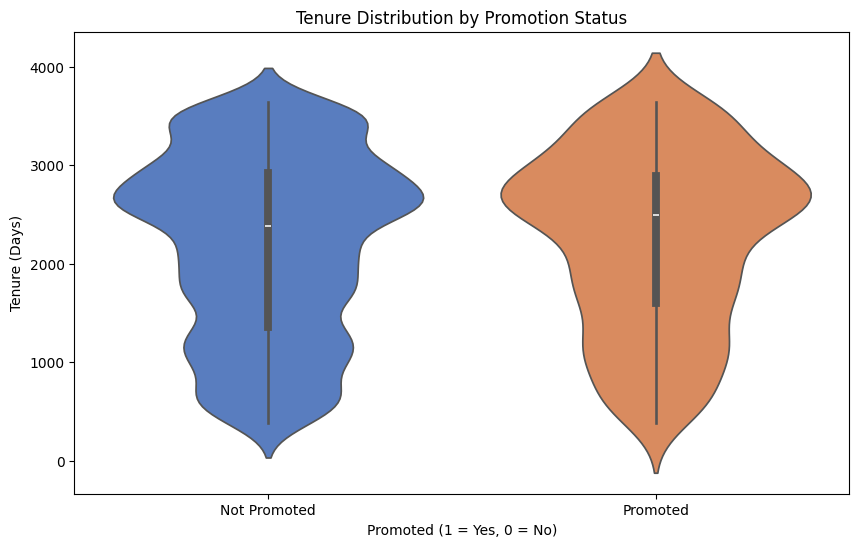

In [9]:
pandas_df['tenure'] = (pd.to_datetime('today') - pandas_df['Date_of_Joining']).dt.days
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_promoted', y='tenure', data=pandas_df, palette='muted')
plt.title('Tenure Distribution by Promotion Status')
plt.xlabel('Promoted (1 = Yes, 0 = No)')
plt.ylabel('Tenure (Days)')
plt.xticks([0, 1], ['Not Promoted', 'Promoted'])
plt.show()

### Hypothesis : Employees with higher punctuality scores are more likely to be promoted.

C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_22392\933175687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_promoted', y='punctuality', data=pandas_df, palette='Set2')


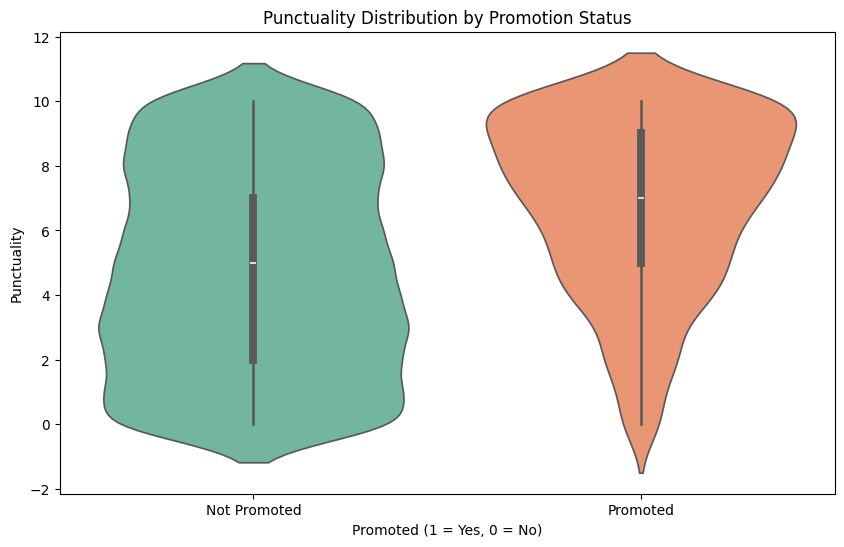

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_promoted', y='punctuality', data=pandas_df, palette='Set2')
plt.title('Punctuality Distribution by Promotion Status')
plt.xlabel('Promoted (1 = Yes, 0 = No)')
plt.ylabel('Punctuality')
plt.xticks([0, 1], ['Not Promoted', 'Promoted'])
plt.show()

### Hypothesis : Promotion is affected by the Training Domain

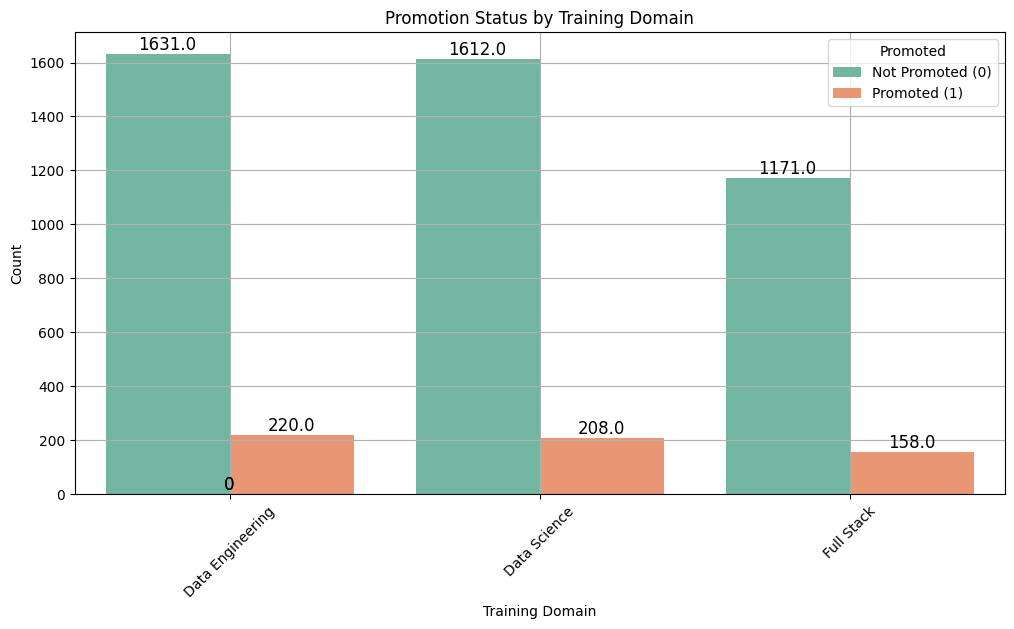

In [11]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='domain', hue='is_promoted', data=pandas_df, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)

plt.title('Promotion Status by Training Domain')
plt.xlabel('Training Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Promoted', labels=['Not Promoted (0)', 'Promoted (1)'])
plt.grid()
plt.show()

# FEATURE ENGINEERING

### Feature Creation

In [12]:
#Calculating age of employee
pandas_df['Age'] = (pd.to_datetime('today') - pandas_df['Date_of_Birth']).dt.days // 365

# Calculating the number of years since employee joined
pandas_df['Tenure'] = (pd.to_datetime('today') - pandas_df['Date_of_Joining']).dt.days//365

# Calculating duration of Training
pandas_df['Training_Duration'] = (pandas_df['end_date'] - pandas_df['start_date']).dt.days

# Calculating Average Score per Training
pandas_df['Avg_Score'] = (pandas_df['score']+pandas_df['punctuality']+pandas_df['discipline']+pandas_df['standards'])/4

pandas_df.head()

,score_id,Training_id,Emp_id,score,punctuality,discipline,standards,remarks,is_promoted,name,...,training_name,start_date,end_date,Trainer_id,domain,tenure,Age,Tenure,Training_Duration,Avg_Score
0,1,14,83,9,3,4,4,Excellent,0,Robert King,...,Seamless content-based standardization,2023-12-13,2024-10-30,185,Data Engineering,3078,36,8,322,5.00
1,2,6,136,6,4,7,7,Excellent,1,Jasmine Salas,...,Advanced discrete function,2024-03-25,2024-05-10,191,Data Science,1183,43,3,46,6.00
2,3,30,34,0,3,0,2,Excellent,0,Joseph White,...,Vision-oriented bifurcated model,2024-04-29,2024-07-17,184,Full Stack,3639,30,9,79,1.25
3,4,15,111,10,8,2,1,Average,0,Leonard Bass,...,Focused context-sensitive leverage,2023-12-12,2023-12-30,182,Data Engineering,1236,41,3,18,5.25
4,5,1,98,9,9,2,2,Excellent,0,Christine Johnson,...,Cross-platform 6thgeneration extranet,2024-09-28,2024-10-02,197,Data Engineering,810,45,2,4,5.50


### Feature Bucketing

In [13]:
bins = [0, 2, 5, float('inf')]  
labels = ['Short-Term', 'Medium-Term', 'Long-Term']

# Bucketing Tenure of Employee into Short, Medium, and Long
pandas_df['Tenure_Category'] = pd.cut(pandas_df['Tenure'], bins=bins, labels=labels, right=False)

bins = [0, 50, 100, float('inf')]  
labels = ['Short-Period', 'Medium-Period', 'Long-Period']

# Bucketing Tenure of Employee into Short, Medium, and Long
pandas_df['Training_Duration_Category'] = pd.cut(pandas_df['Training_Duration'], bins=bins, labels=labels, right=False)
pandas_df.head()

,score_id,Training_id,Emp_id,score,punctuality,discipline,standards,remarks,is_promoted,name,...,end_date,Trainer_id,domain,tenure,Age,Tenure,Training_Duration,Avg_Score,Tenure_Category,Training_Duration_Category
0,1,14,83,9,3,4,4,Excellent,0,Robert King,...,2024-10-30,185,Data Engineering,3078,36,8,322,5.00,Long-Term,Long-Period
1,2,6,136,6,4,7,7,Excellent,1,Jasmine Salas,...,2024-05-10,191,Data Science,1183,43,3,46,6.00,Medium-Term,Short-Period
2,3,30,34,0,3,0,2,Excellent,0,Joseph White,...,2024-07-17,184,Full Stack,3639,30,9,79,1.25,Long-Term,Medium-Period
3,4,15,111,10,8,2,1,Average,0,Leonard Bass,...,2023-12-30,182,Data Engineering,1236,41,3,18,5.25,Medium-Term,Short-Period
4,5,1,98,9,9,2,2,Excellent,0,Christine Johnson,...,2024-10-02,197,Data Engineering,810,45,2,4,5.50,Medium-Term,Short-Period


In [14]:
final_df = pandas_df[['score','punctuality','discipline','standards','Avg_Score','Age', 'remarks','Gender','Region','Department','Designation','domain','Tenure_Category','Training_Duration_Category','is_promoted']]
final_df.head()

,score,punctuality,discipline,standards,Avg_Score,Age,remarks,Gender,Region,Department,Designation,domain,Tenure_Category,Training_Duration_Category,is_promoted
0,9,3,4,4,5.00,36,Excellent,Male,Mumbai,Developer,Principal Architect,Data Engineering,Long-Term,Long-Period,0
1,6,4,7,7,6.00,43,Excellent,Female,Mumbai,Sale,Solutions Enabler,Data Science,Medium-Term,Short-Period,1
2,0,3,0,2,1.25,30,Excellent,Female,Hyderabad,Analyst,Solutions Enabler,Full Stack,Long-Term,Medium-Period,0
3,10,8,2,1,5.25,41,Average,Male,Bangalore,Sale,Solutions Enabler,Data Engineering,Medium-Term,Short-Period,0
4,9,9,2,2,5.50,45,Excellent,Male,Chennai,Analyst,Senior Software Engineer,Data Engineering,Medium-Term,Short-Period,0


### Feature Transformation

In [15]:
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Region', 'Department', 'Designation', 'domain', 'remarks','Training_Duration_Category','Tenure_Category']

for column in categorical_columns:
    final_df[column] = label_encoder.fit_transform(pandas_df[column])

final_df.head()

C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_22392\562087954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[column] = label_encoder.fit_transform(pandas_df[column])
C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_22392\562087954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[column] = label_encoder.fit_transform(pandas_df[column])
C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_22392\562087954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

,score,punctuality,discipline,standards,Avg_Score,Age,remarks,Gender,Region,Department,Designation,domain,Tenure_Category,Training_Duration_Category,is_promoted
0,9,3,4,4,5.00,36,1,1,5,2,0,0,0,0,0
1,6,4,7,7,6.00,43,1,0,5,5,4,1,1,2,1
2,0,3,0,2,1.25,30,1,0,3,0,4,2,0,1,0
3,10,8,2,1,5.25,41,0,1,0,5,4,0,1,2,0
4,9,9,2,2,5.50,45,1,1,1,0,1,0,1,2,0


### Feature Correlation

In [16]:
correlation_matrix = final_df.corr()

target_correlation = correlation_matrix['is_promoted'].sort_values(ascending=False)

print(target_correlation)

is_promoted                   1.000000
Avg_Score                     0.434290
standards                     0.221541
discipline                    0.215674
punctuality                   0.214479
score                         0.208304
Training_Duration_Category    0.003198
Region                        0.001014
Gender                        0.000800
domain                       -0.000646
Age                          -0.007909
Department                   -0.014532
Tenure_Category              -0.018494
Designation                  -0.019275
remarks                      -0.128905
Name: is_promoted, dtype: float64


In [17]:
correlation_matrix = final_df.corr()
target_correlation = correlation_matrix['is_promoted']
threshold = 0.1
highly_related_features = target_correlation[abs(target_correlation) > threshold].index.tolist()
highly_related_features.remove('is_promoted')

print("Highly related features:", highly_related_features)

Highly related features: ['score', 'punctuality', 'discipline', 'standards', 'Avg_Score', 'remarks']


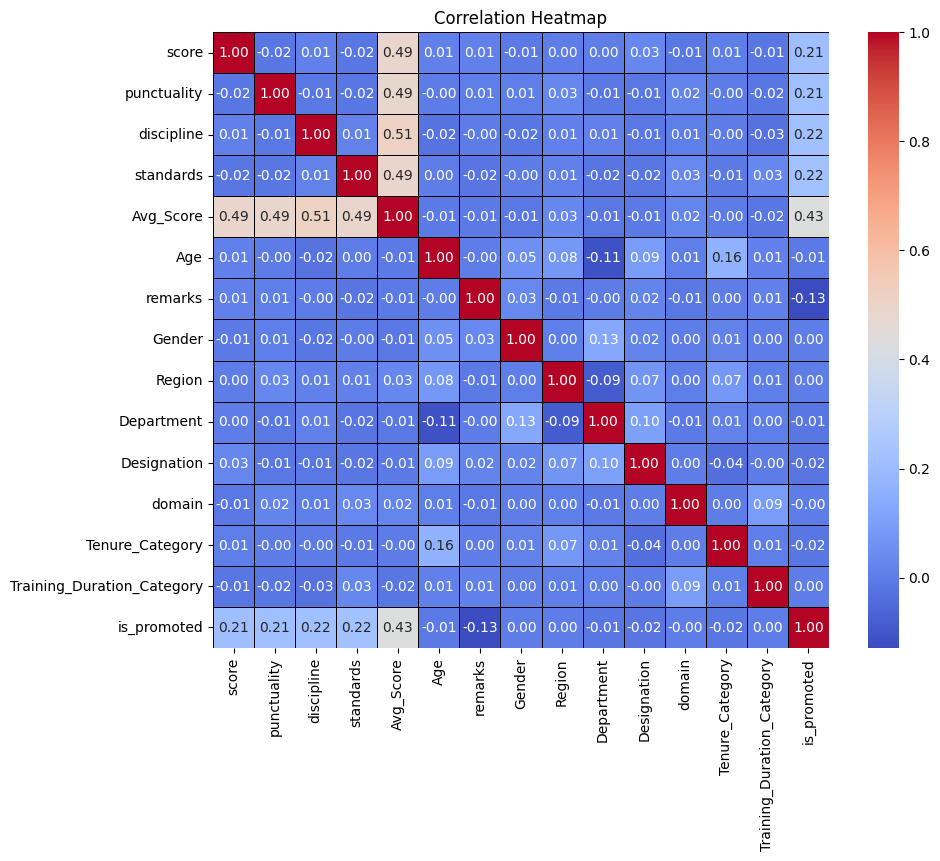

In [18]:
correlation_matrix = final_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, 
            linewidths=0.5, linecolor='black')

# Set titles and labels
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

### Feature Selection

In [19]:
final_df = final_df[['score','punctuality','discipline','standards','remarks','is_promoted']]

### Model Development
#### Model Training and Testing, Feature importance


Model: Logistic Regression
ROC AUC (Train): 0.9151445334209614
ROC AUC (Test): 0.9180563866413438
Optimal Threshold (Train): 0.10549498353680765
Optimal Threshold (Test): 0.10549498353680765
F1 Score (Train): 0.5582255083179297
F1 Score (Test): 0.6031746031746031
ROC AUC Score Difference: 0.0029118532203824543


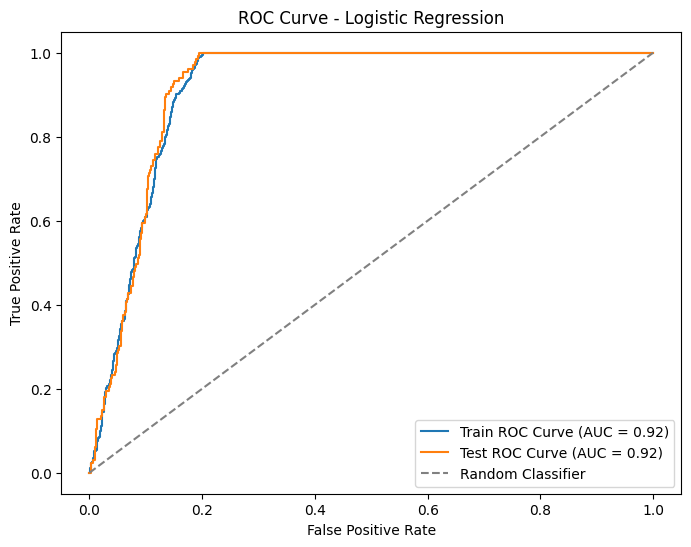


Model: Random Forest
ROC AUC (Train): 1.0
ROC AUC (Test): 0.9986211202747353
Optimal Threshold (Train): 0.63
Optimal Threshold (Test): 0.63
F1 Score (Train): 1.0
F1 Score (Test): 0.8786610878661087
ROC AUC Score Difference: 0.0013788797252647367


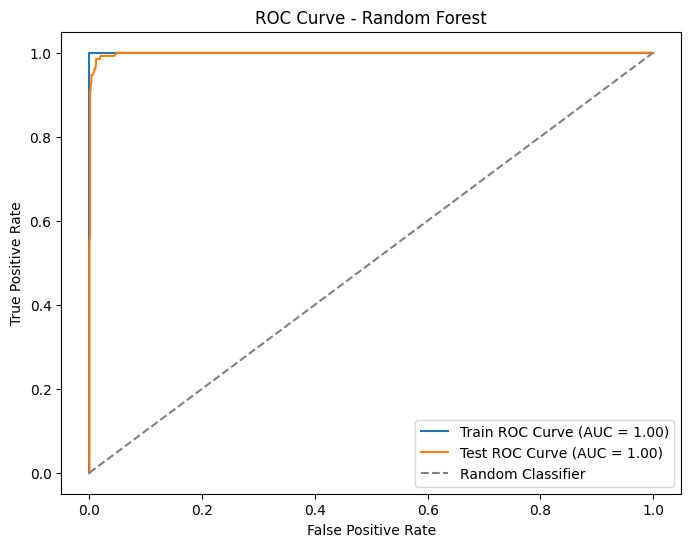


Model: Decision Tree
ROC AUC (Train): 1.0
ROC AUC (Test): 0.9228044158840008
Optimal Threshold (Train): 1.0
Optimal Threshold (Test): 1.0
F1 Score (Train): 1.0
F1 Score (Test): 0.8871595330739299
ROC AUC Score Difference: 0.07719558411599925


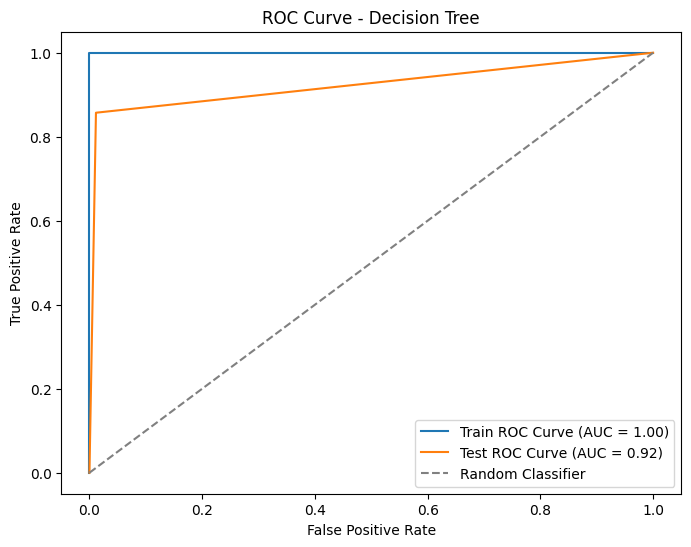


Model: Gradient Boosting
ROC AUC (Train): 0.9998356973620091
ROC AUC (Test): 0.9987512032676849
Optimal Threshold (Train): 0.33395544747366207
Optimal Threshold (Test): 0.33395544747366207
F1 Score (Train): 0.967948717948718
F1 Score (Test): 0.9361702127659575
ROC AUC Score Difference: 0.0010844940943242065


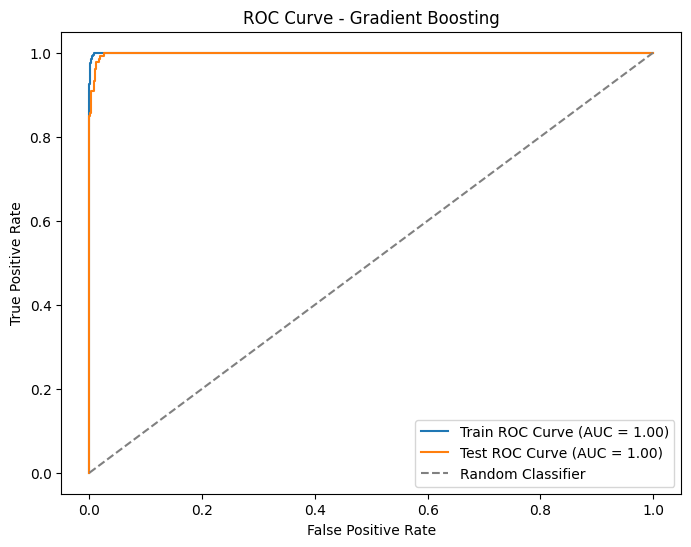


Model: Support Vector Machine
ROC AUC (Train): 0.9823654725474563
ROC AUC (Test): 0.9742522395955285
Optimal Threshold (Train): 0.11657674067198395
Optimal Threshold (Test): 0.11657674067198395
F1 Score (Train): 0.7252215954875101
F1 Score (Test): 0.7550432276657061
ROC AUC Score Difference: 0.008113232951927785


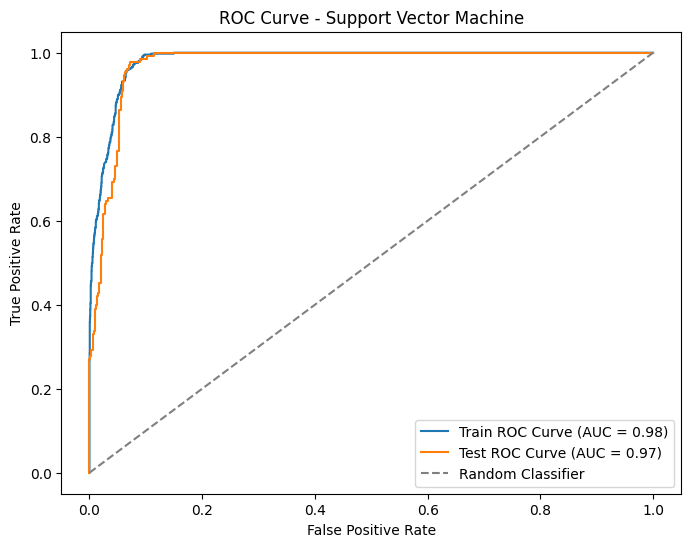


Best Model: Gradient Boosting with F1 Score Difference: 0.0010844940943242065


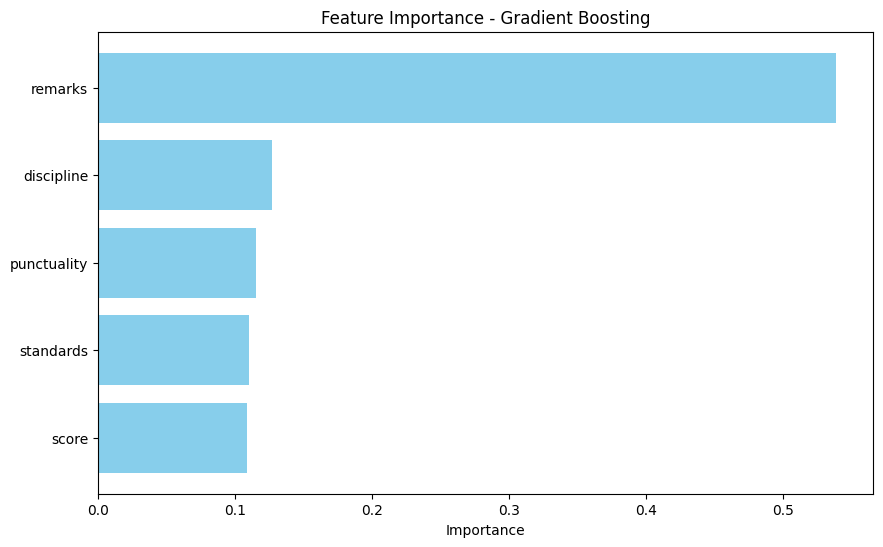

In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
 
# Features and target variable
X = final_df.drop('is_promoted', axis=1)
y = final_df['is_promoted']
 
# Convert string values to numeric
X = X.apply(pd.to_numeric, errors='coerce')
 
# Drop rows with missing values
X.dropna(inplace=True)
y = y[X.index]
 
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Define classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True)  # probability=True for predict_proba
}

best_model_name = None
best_roc_score_diff = float('inf')  # Start with a large value
best_model = None

# Evaluate each model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
 
    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for both train and test sets
    y_prob_train = model.predict_proba(X_train)[:, 1]  # Probabilities for class 1 (train set)
    y_prob_test = model.predict_proba(X_test)[:, 1]    # Probabilities for class 1 (test set)
 
    roc_auc_train = roc_auc_score(y_train, y_prob_train)
    roc_auc_test = roc_auc_score(y_test, y_prob_test)
 
    print(f'ROC AUC (Train): {roc_auc_train}')
    print(f'ROC AUC (Test): {roc_auc_test}')
    # Compute ROC curve to find the optimal threshold
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test)
 
    # Find the optimal threshold for the train and test sets
    optimal_idx_train = (tpr_train - fpr_train).argmax()
    optimal_threshold_train = thresholds_train[optimal_idx_train]
 
    optimal_idx_test = (tpr_test - fpr_test).argmax()
    optimal_threshold_test = optimal_threshold_train
 
    print(f'Optimal Threshold (Train): {optimal_threshold_train}')
    print(f'Optimal Threshold (Test): {optimal_threshold_test}')
 
    # Convert probabilities to binary predictions using the optimal threshold
    y_pred_train = (y_prob_train >= optimal_threshold_train).astype(int)
    y_pred_test = (y_prob_test >= optimal_threshold_test).astype(int)
 
    # Calculate F1 scores for both train and test sets
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    roc_score_diff = abs(roc_auc_train - roc_auc_test)

    # Check if this is the best model based on least difference
    if roc_score_diff < best_roc_score_diff:
        best_roc_score_diff = roc_score_diff
        best_model_name = model_name
        best_model = model
 
    print(f'F1 Score (Train): {f1_train}')
    print(f'F1 Score (Test): {f1_test}')
    print(f'ROC AUC Score Difference: {roc_score_diff}')
 
    # Plot the ROC Curve for both train and test sets
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {roc_auc_score(y_train, y_prob_train):.2f})')
    plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_score(y_test, y_prob_test):.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='best')
    plt.show() 

# Display the best model
print(f"\nBest Model: {best_model_name} with F1 Score Difference: {best_roc_score_diff}")

# Display feature importance for the best model
if hasattr(best_model, 'feature_importances_'):  # For tree-based models
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })
elif hasattr(best_model, 'coef_'):  # For Logistic Regression
    importances = np.abs(best_model.coef_[0])
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Feature Importance - {best_model_name}')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()


Model: Logistic Regression
F1 Score (Train): 0.28865979381443296
F1 Score (Test): 0.29015544041450775
Accuracy (Train): 0.87925
Accuracy (Test): 0.863
Precision (Train): 0.4336283185840708
Precision (Test): 0.4666666666666667
Recall (Train): 0.2163355408388521
Recall (Test): 0.21052631578947367
Difference in F1 Scores: 0.0014956466000747848

Model: Random Forest
F1 Score (Train): 1.0
F1 Score (Test): 0.92
Accuracy (Train): 1.0
Accuracy (Test): 0.98
Precision (Train): 1.0
Precision (Test): 0.9829059829059829
Recall (Train): 1.0
Recall (Test): 0.8646616541353384
Difference in F1 Scores: 0.07999999999999996

Model: Decision Tree
F1 Score (Train): 1.0
F1 Score (Test): 0.8784313725490196
Accuracy (Train): 1.0
Accuracy (Test): 0.969
Precision (Train): 1.0
Precision (Test): 0.9180327868852459
Recall (Train): 1.0
Recall (Test): 0.8421052631578947
Difference in F1 Scores: 0.1215686274509804

Model: Gradient Boosting
F1 Score (Train): 0.9684684684684685
F1 Score (Test): 0.9343629343629344
Accur

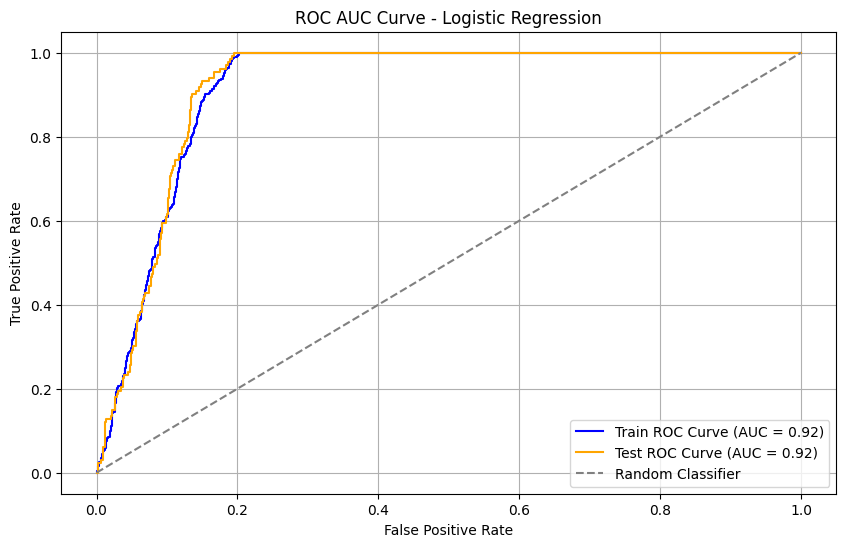

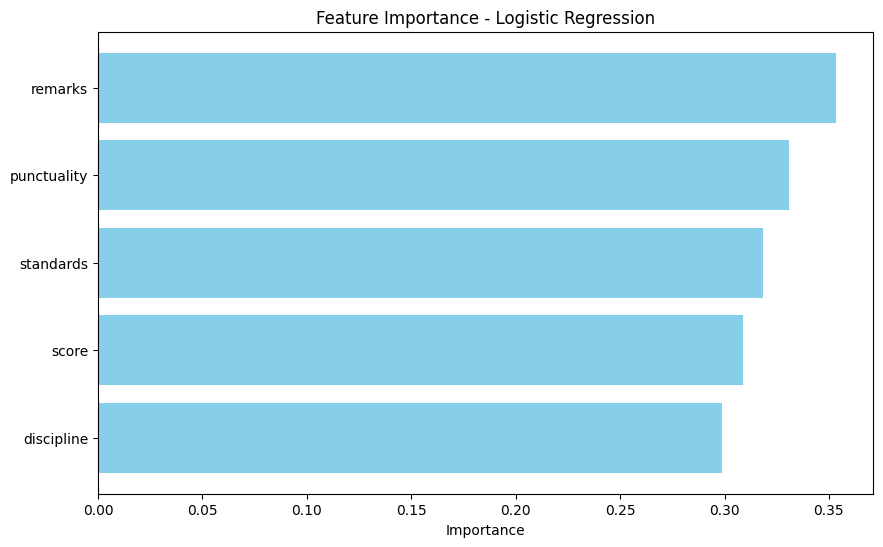

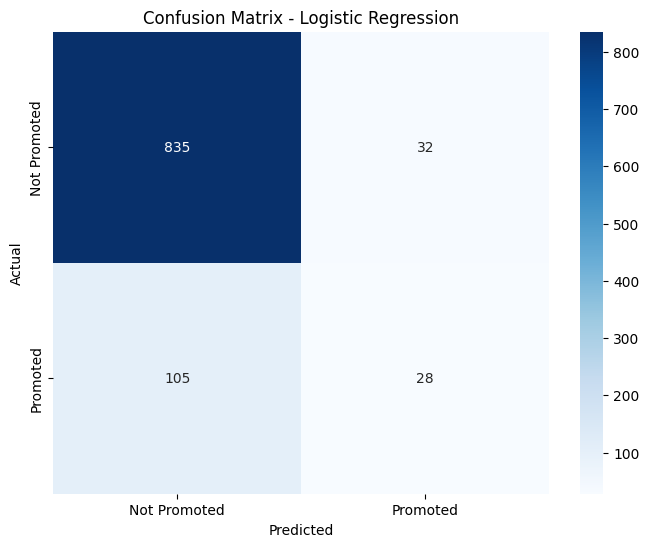

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, roc_auc_score, f1_score, 
                             accuracy_score, precision_score, recall_score,
                             confusion_matrix)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Features and target variable
X = final_df.drop('is_promoted', axis=1)
y = final_df['is_promoted']

# Convert string values to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
X.dropna(inplace=True)
y = y[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True)  # probability=True for predict_proba
}

best_model_name = None
best_f1_score_diff = float('inf')  # Start with a large value
best_model = None

# Evaluate each model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities and labels for both train and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_prob_train = model.predict_proba(X_train)[:, 1]  # Get probabilities for the train set
    y_prob_test = model.predict_proba(X_test)[:, 1]    # Get probabilities for the test set

    # Calculate F1 scores for both train and test sets
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    # Calculate accuracy, precision, and recall
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)

    # Calculate the difference in F1 scores
    f1_score_diff = abs(f1_train - f1_test)

    print(f'F1 Score (Train): {f1_train}')
    print(f'F1 Score (Test): {f1_test}')
    print(f'Accuracy (Train): {accuracy_train}')
    print(f'Accuracy (Test): {accuracy_test}')
    print(f'Precision (Train): {precision_train}')
    print(f'Precision (Test): {precision_test}')
    print(f'Recall (Train): {recall_train}')
    print(f'Recall (Test): {recall_test}')
    print(f'Difference in F1 Scores: {f1_score_diff}')

    # Check if this is the best model based on least difference
    if f1_score_diff < best_f1_score_diff:
        best_f1_score_diff = f1_score_diff
        best_model_name = model_name
        best_model = model

# Display the best model
print(f"\nBest Model: {best_model_name} with F1 Score Difference: {best_f1_score_diff}")

# Plot ROC AUC Curve for both training and testing sets for the best model
y_prob_best_train = best_model.predict_proba(X_train)[:, 1]  # Get probabilities for the training set
y_prob_best_test = best_model.predict_proba(X_test)[:, 1]    # Get probabilities for the testing set

fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_best_train)
roc_auc_train = roc_auc_score(y_train, y_prob_best_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_best_test)
roc_auc_test = roc_auc_score(y_test, y_prob_best_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC AUC Curve - {best_model_name}')
plt.legend(loc='best')
plt.grid()
plt.show()

# Display feature importance for the best model
if hasattr(best_model, 'feature_importances_'):  # For tree-based models
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })
elif hasattr(best_model, 'coef_'):  # For Logistic Regression
    importances = np.abs(best_model.coef_[0])
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Feature Importance - {best_model_name}')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

# Confusion Matrix for the best model
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Promoted', 'Promoted'], 
            yticklabels=['Not Promoted', 'Promoted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()
